<a href="https://colab.research.google.com/github/mashrur-rahman-fahim/Machine_learning_projects/blob/main/lnr_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import mean_squared_error

plt.style.use("ggplot")
import math,copy
data=np.loadtxt("ex1data1.txt",delimiter=',')
x_train=data[:,0]
y_train=data[:,1]
x_train=x_train.reshape(-1,1)
print(type(x_train))
print(x_train[:5])
print(y_train[:5])
print(x_train.shape)
print(y_train.shape)


<class 'numpy.ndarray'>
[[6.1101]
 [5.5277]
 [8.5186]
 [7.0032]
 [5.8598]]
[17.592   9.1302 13.662  11.854   6.8233]
(97, 1)
(97,)


visualizing data

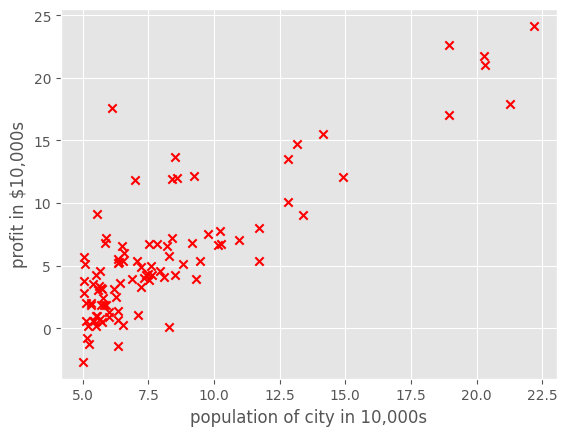

In [197]:
plt.scatter(x_train,y_train,marker='x',c='r')
plt.xlabel("population of city in 10,000s")
plt.ylabel("profit in $10,000s")
plt.show()

computing cost

In [198]:
def compute_cost(x,y,w,b):
  m,n=x.shape
  total=0
  for i in range(m):
    f_wb=np.dot(w,x[i])+b
    total+=(f_wb-y[i])**2
  return total/(2*m)

m,n=x_train.shape
w_in=np.full(n,2)
b_in=1
cost=compute_cost(x_train,y_train,w_in,b_in)
print(cost)


75.20338497891959


cmputing cost by scikit

In [199]:

model = SGDRegressor(max_iter=1000, random_state=1)
model.fit(x_train,y_train)
model.coef_=np.full(n,2)
model.intercept_=1
y_prd=model.predict(x_train)
print(mean_squared_error(y_prd,y_train)/2)


75.20338497891959


computing grad_dec

In [200]:
def com_grad(x,y,w,b):
  m,n=x.shape
  dj_dw=np.zeros(n)
  dj_db=0
  for i in range(m):
    err= (np.dot(w,x[i])+b)-y[i]
    for j in  range(n):
      dj_dw[j]+=err*x[i,j]
    dj_db+=err
  dj_dw/=m
  dj_db/=m
  return dj_dw,dj_db

def gradient_descent(x,y,w_in,b_in,it,alpha,cost_f,grad_f):
  w=copy.deepcopy(w_in)
  b=b_in
  j_his=[]
  w_his=[]
  for i in range(it):
    dj_dw,dj_db=com_grad(x,y,w,b)
    w=w-alpha*dj_dw
    b=b-alpha*dj_db
    if i<100000:
      j_his.append(cost_f(x,y,w,b))
    if i%150==0:
      w_his.append(w)
      print(f"iteration {i:4}: cost {j_his[-1]:0.2e}")
  return w,b,j_his,w_his

In [201]:
m,n=x_train.shape
w_in=np.zeros(n)
b=0
tmp_dw,tmp_db=com_grad(x_train,y_train,w_in,b)
print(tmp_dw)
print(tmp_db)
w_in=np.full(n,0.2)
b=0.2
tmp_dw,tmp_db=com_grad(x_train,y_train,w_in,b)
print(tmp_dw)
print(tmp_db)

[-65.32884975]
-5.83913505154639
[-47.41610118]
-4.007175051546391


In [202]:
w_in=np.zeros(n)
b_in=0
alpha=0.01
it=1500
w,b,_,_=gradient_descent(x_train,y_train,w_in,b_in,it,alpha,compute_cost,com_grad)
print(w)
print(b)
model=SGDRegressor(max_iter=1500,eta0=0.01,random_state=1,learning_rate='constant')
model.fit(x_train,y_train)
print(model.coef_)
print(model.intercept_)
# x_nor=StandardScaler().fit_transform(x_train)
# model=SGDRegressor(max_iter=1500,eta0=0.01,random_state=1,learning_rate='constant')
# model.coef_=w_in
# model.intercept_=b_in
# model.fit(x_nor,y_train)
# print(model.coef_)
# print(model.intercept_)

iteration    0: cost 6.74e+00
iteration  150: cost 5.31e+00
iteration  300: cost 4.96e+00
iteration  450: cost 4.76e+00
iteration  600: cost 4.64e+00
iteration  750: cost 4.57e+00
iteration  900: cost 4.53e+00
iteration 1050: cost 4.51e+00
iteration 1200: cost 4.50e+00
iteration 1350: cost 4.49e+00
[1.16636235]
-3.63029143940436
[1.15651867]
[-3.80034509]


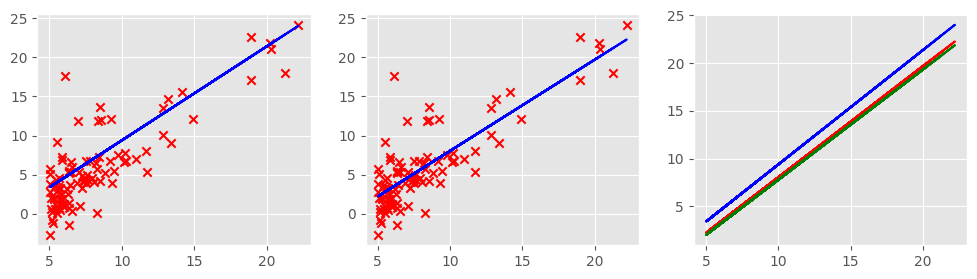

In [208]:
y_pred_an=np.dot(x_train,w)+b

x=PolynomialFeatures(degree=1).fit_transform(x_train)
model=SGDRegressor(max_iter=10000,random_state=1)
model.fit(x,y_train)
y_pred=model.predict(x)
model=SGDRegressor(max_iter=1500,eta0=0.01,random_state=1,learning_rate='constant')
model.fit(x_train,y_train)
y_pred_sim=model.predict(x_train)
fig,ax=plt.subplots(1,3,figsize=(12,3))
ax[0].scatter(x_train,y_train,c='r',marker='x')
ax[0].plot(x_train,y_pred,c='b')
ax[1].scatter(x_train,y_train,c='r',marker='x')
ax[1].plot(x_train,y_pred_an,c='b')
ax[2].plot(x_train,y_pred,c='b')
ax[2].plot(x_train,y_pred_an,c='r')
ax[2].plot(x_train,y_pred_sim,c='g')


plt.show()






In [207]:
print((3.5*w+b)*10000)
print((7.0*w+b)*10000)

[4519.7678677]
[45342.45012945]
